In [1]:
import numpy as np
import pandas as pd
from skimage.transform import rotate, rescale
import matplotlib.pyplot as plt
from matplotlib.path import Path
import fiona
import shapely.geometry as geometry
from shapely.geometry import Point
from shapely.affinity import rotate
from descartes import PolygonPatch
import pylab as pl
from src import *

Some examples of the random two-dimentional objects that we are going to use. They are generated by concave hulls of random points in the two-dimentional space.

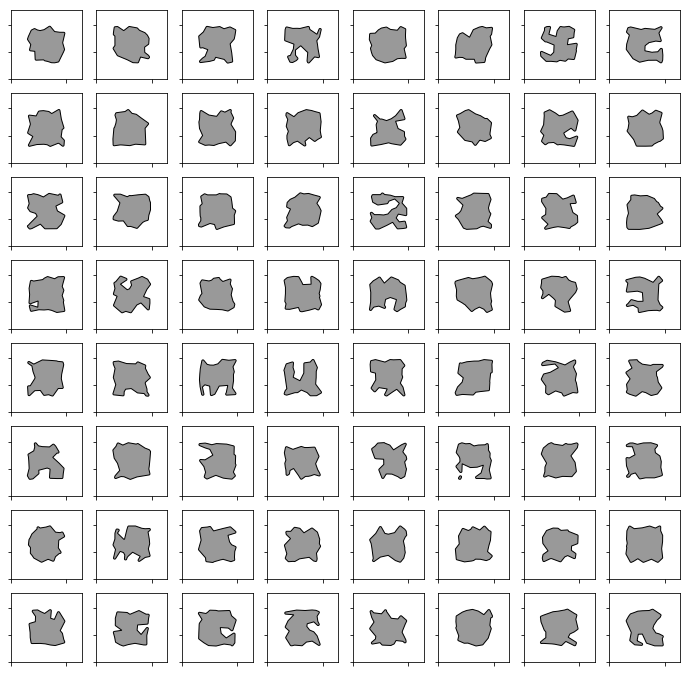

In [2]:
n_point = 60; alpha = .2
fig = pl.figure(figsize=(12,12))

for i in range(64):
    a = np.random.uniform(16,48,size=(n_point,2))
    points = [Point(a[i]) for i in range(n_point)]
    concave_hull, edge_points = alpha_shape(points, alpha=alpha)

    ax = fig.add_subplot(8,8,i+1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_xlim([0, 64]) #ax.set_xlim([x_min-margin, x_max+margin])
    ax.set_ylim([0, 64])
    patch = PolygonPatch(concave_hull.buffer(1), fc='#999999', ec='#000000', fill=True, zorder=-1)
    ax.add_patch(patch)    

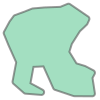

In [3]:
concave_hull.buffer(1)

# Data generation
We will study on 100.000 randomly generated two-dimentional objects. For each object, we take 1.000 one-dimentional image by taking integrals.

In [ ]:
%time
f_angles = open('data_angles.tab', 'w')
f_1d_images = open('1d_images.tab', 'w')


for i in range(100000):
    a = np.random.uniform(16,48,size=(n_point,2))
    points = [Point(a[i]) for i in range(n_point)]
    concave_hull, edge_points = alpha_shape(points, alpha=alpha)
    
    #if the result is a multipolygon, select the first polygon
    t_poly = concave_hull.buffer(1)
    if(type(t_poly) == geometry.multipolygon.MultiPolygon):
        t_poly = t_poly[0]
    
    rotation_angles = np.hstack((np.array([0.],dtype='float32'), np.random.uniform(0,360, size = 999).astype('float32')))
    rotated_polygons = [rotate(t_poly,k) for k in rotation_angles]
    one_d_images = np.array([generate_one_d_image(rotated_polygons[k]) for k in range(1000)])
    
    np.savetxt(f_angles, rotation_angles, delimiter='\t', fmt='%1.3f')
    np.savetxt(f_1d_images, one_d_images, delimiter='\t', fmt='%1.3f')
    
    
f_angles.close()
f_1d_images.close()

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 11 µs
